In [3]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 217 GB / percent used: 13.7 %


# Check model data

In [21]:
path = '/ccc/store/cont003/thredds/mellull/LMDZOR/PROD/amip/CM6012-LR-amip-02'
path_guided = '/ccc/store/cont003/thredds/mellull/LMDZOR/PROD/amip/CM6012-LR-amip-G-02'

folder = 'ATM'
var_LMDZ = 'ta'
# var_LMDZ = 'temp'

In [22]:
xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc')

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 143, lon: 144, plev: 17, time_counter: 192)
Coordinates:
  * lat                   (lat) float32 90.0 88.73239 ... -88.73239 -90.0
  * lon                   (lon) float32 -180.0 -177.5 -175.0 ... 175.0 177.5
  * plev                  (plev) float32 100000.0 92500.0 ... 2000.0 1000.0
    time_centered         (time_counter) object ...
  * time_counter          (time_counter) object 1999-01-16 12:00:00 ... 2014-12-16 12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) object ...
    ta                    (time_counter, plev, lat, lon) float32 ...
Attributes:
    name:                      histmthNMC
    description:               Created by xios
    title:                     Created by xios
    Conventions:               CF-1.6
    timeStamp:                 2017-Oct-31 15:28:40 GMT
    uuid:                      91514e1e-8d18-4311-91ff-68d871f046dc
    LongName:                  LMDZOR configuration
    history:                   Wed Nov  1 17:10:54 2017: ncrcat -C --buffer_s...
    nco_openmp_thread_number:  1

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


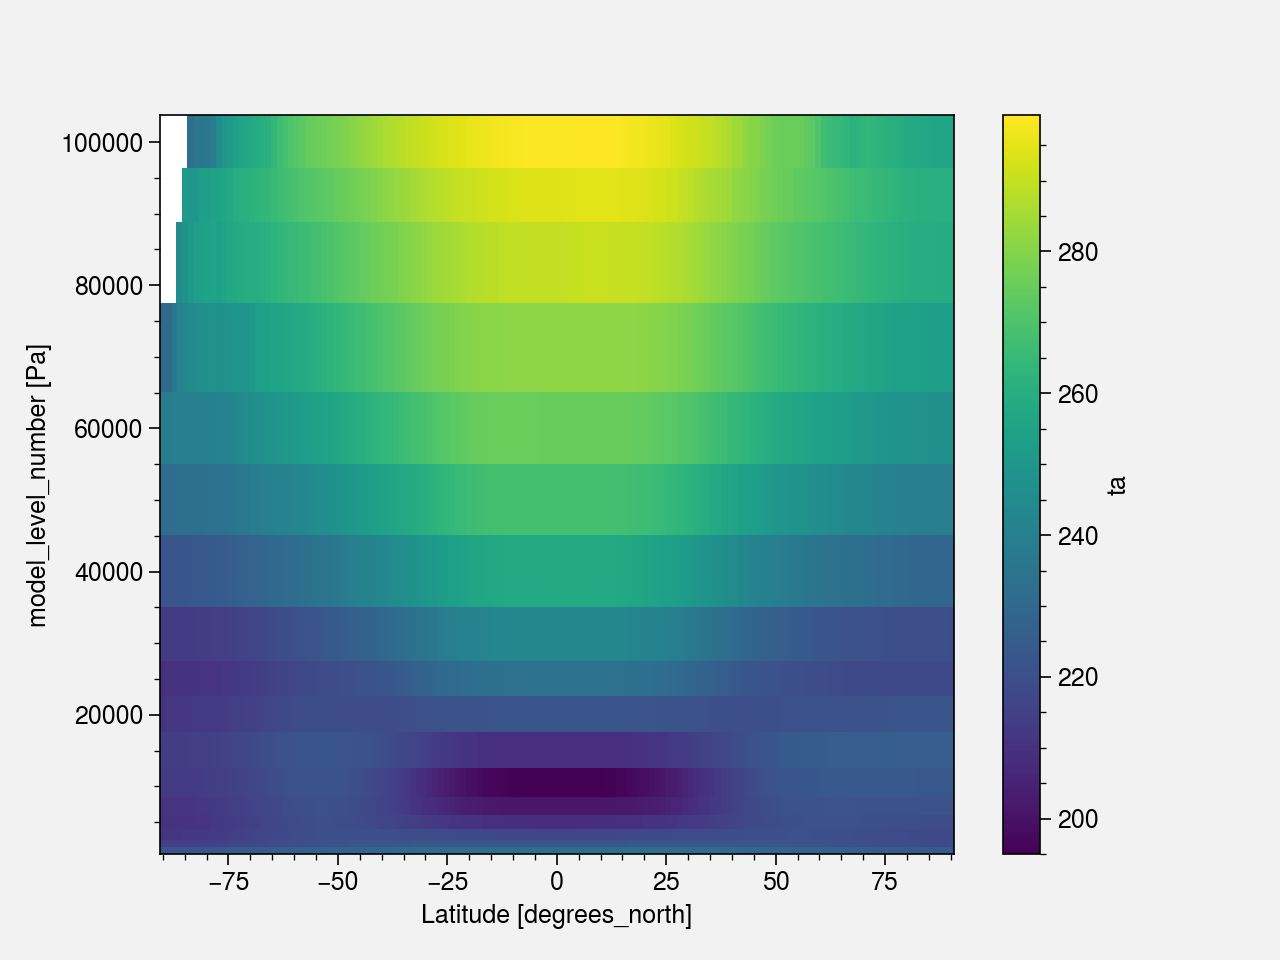

In [24]:
xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc')[var_LMDZ].mean('time_counter').mean('lon').plot()

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


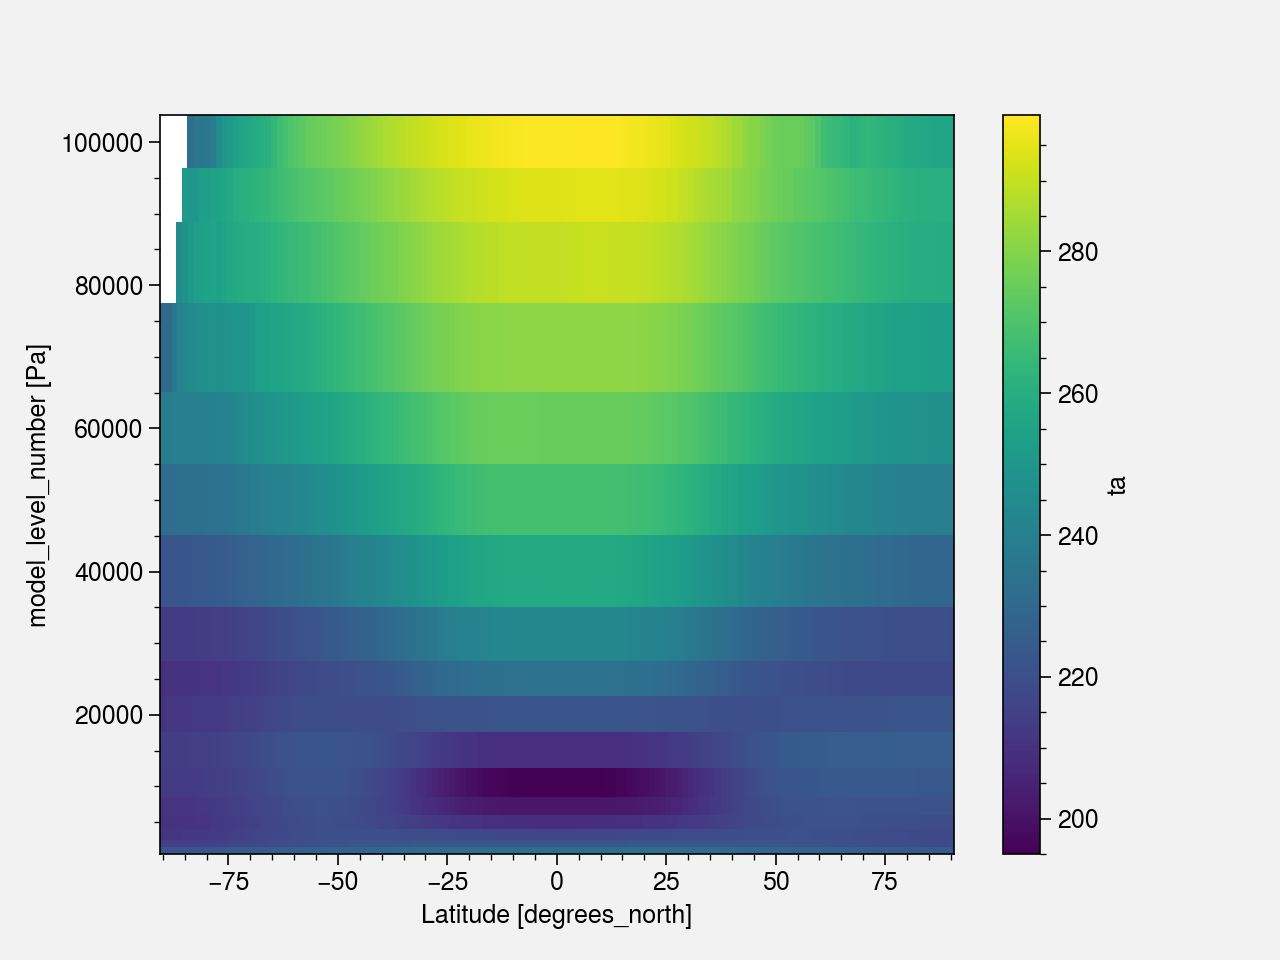

In [24]:
xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc')[var_LMDZ].mean('time_counter').mean('lon').plot()

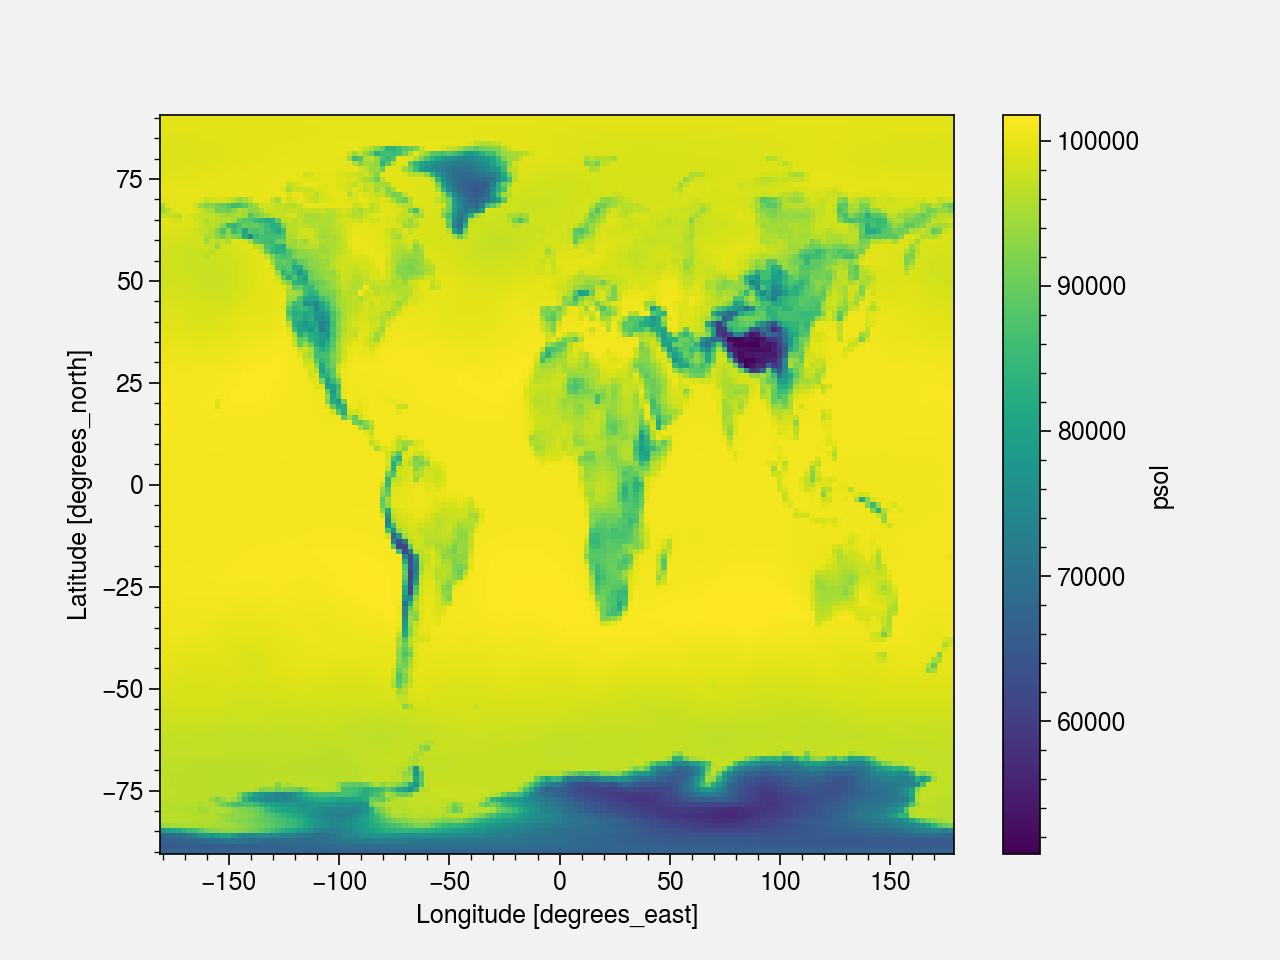

In [27]:
xr.open_dataset(path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20141231_1M_psol.nc')['psol'].min('time_counter').plot()

# Define period and zone

In [26]:
# Define common period
period = slice('1999','2014')

# Define zone
latlim=(10,50)
lonlim=(60,110)

var = 'ta'
label = 'Air Temperature'
units = '°C'
cmap='CoolWarm'
levels=plot.arange(-7,7,1)

# Get model data guided and not guided

In [28]:
model_guided = xr.open_dataset(
    path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc'
)[var_LMDZ].sel(time_counter=period)
model_guided = model_guided.rename({'time_counter': 'time'}) - 273.15
model_guided.attrs['units'] = '°C'
model_guided

<xarray.DataArray 'ta' (time: 192, plev: 17, lat: 143, lon: 144)>
array([[[[-31.506989 , -31.506989 , -31.506989 , ..., -31.506989 ,
          -31.506989 , -31.506989 ],
         [-30.92218  , -30.96199  , -30.995483 , ..., -30.768875 ,
          -30.831787 , -30.874084 ],
         [-31.53305  , -31.55008  , -31.66536  , ..., -31.170029 ,
          -31.257828 , -31.363556 ],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        [[-23.375244 , -23.375244 , -23.375244 , ..., -23.375244 ,
          -23.375244 , -23.375244 ],
         [-24.292358 , -24.330399 , -24.346298 , ..., -24.23146  ,
          -24.254196 , -24.285309 ],
         [-25.03038  , -25.070038 , -25.112823 , ..., -24.911743 ,
          -24.959244 , -24.99559  ],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        [[-23.192078 , -23.192078 , -23.192078 , ..., -23.192078 ,
          -23.192078 , -23.192078 ],
         [-23.710281 , -23.725525 , -23.755661 , ..., -23.655289 ,
          -23.677017 , -23.687057 ],
         [-24.065735 , -24.121292 , -24.143326 , ..., -24.004456 ,
          -24.03276  , -24.058578 ],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        ...,

        [[-66.2319   , -66.2319   , -66.2319   , ..., -66.2319   ,
          -66.2319   , -66.2319   ],
         [-66.028564 , -66.01927  , -66.01097  , ..., -66.061874 ,
          -66.049866 , -66.03876  ],
         [-65.530045 , -65.512115 , -65.49606  , ..., -65.59447  ,
          -65.57127  , -65.549774 ],
         ...,
         [-34.17328  , -34.181168 , -34.189148 , ..., -34.153427 ,
          -34.159637 , -34.166107 ],
         [-34.319824 , -34.3239   , -34.328293 , ..., -34.309586 ,
          -34.312637 , -34.316055 ],
         [-34.48442  , -34.48442  , -34.48442  , ..., -34.48442  ,
          -34.48442  , -34.48442  ]],

        [[-67.7177   , -67.7177   , -67.7177   , ..., -67.7177   ,
          -67.7177   , -67.7177   ],
         [-67.53163  , -67.525345 , -67.51982  , ..., -67.55534  ,
          -67.54669  , -67.53876  ],
         [-67.09825  , -67.08534  , -67.074066 , ..., -67.14635  ,
          -67.12872  , -67.1127   ],
         ...,
         [-32.12535  , -32.130463 , -32.135025 , ..., -32.11354  ,
          -32.117325 , -32.12094  ],
         [-32.220978 , -32.223755 , -32.2267   , ..., -32.213913 ,
          -32.21605  , -32.218353 ],
         [-32.334442 , -32.334442 , -32.334442 , ..., -32.334442 ,
          -32.334442 , -32.334442 ]],

        [[-67.23921  , -67.23921  , -67.23921  , ..., -67.23921  ,
          -67.23921  , -67.23921  ],
         [-66.97409  , -66.97484  , -66.97612  , ..., -66.97592  ,
          -66.97467  , -66.97403  ],
         [-66.59352  , -66.59552  , -66.59891  , ..., -66.59636  ,
          -66.593994 , -66.593094 ],
         ...,
         [-25.68724  , -25.690155 , -25.692596 , ..., -25.679016 ,
          -25.68193  , -25.684479 ],
         [-25.657928 , -25.659729 , -25.661499 , ..., -25.653107 ,
          -25.654602 , -25.656204 ],
         [-25.657684 , -25.657684 , -25.657684 , ..., -25.657684 ,
          -25.657684 , -25.657684 ]]],


       [[[-33.682037 , -33.682037 , -33.682037 , ..., -33.682037 ,
          -

In [29]:
model = xr.open_dataset(
    path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20141231_1M_'+var_LMDZ+'.nc'
)[var_LMDZ].sel(time_counter=period)
model = model.rename({'time_counter': 'time'}) - 273.15
model.attrs['units'] = '°C'
model

<xarray.DataArray 'ta' (time: 192, plev: 17, lat: 143, lon: 144)>
array([[[[-31.98114  , -31.98114  , -31.98114  , ..., -31.98114  ,
          -31.98114  , -31.98114  ],
         [-31.731842 , -31.177505 , -31.649185 , ..., -31.788727 ,
          -31.831741 , -31.592133 ],
         [-30.905457 , -30.557907 , -30.778168 , ..., -30.621231 ,
          -30.214523 , -30.263931 ],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        [[-17.082794 , -17.082794 , -17.082794 , ..., -17.082794 ,
          -17.082794 , -17.082794 ],
         [-18.190063 , -18.189087 , -18.203903 , ..., -18.16484  ,
          -18.177933 , -18.190582 ],
         [-19.216583 , -19.241806 , -19.249725 , ..., -19.154968 ,
          -19.182953 , -19.214493 ],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        [[-16.930725 , -16.930725 , -16.930725 , ..., -16.930725 ,
          -16.930725 , -16.930725 ],
         [-17.688065 , -17.70987  , -17.71994  , ..., -17.648468 ,
          -17.667587 , -17.683487 ],
         [-18.649277 , -18.66336  , -18.690079 , ..., -18.59108  ,
          -18.616226 , -18.648132 ],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        ...,

        [[-70.6573   , -70.6573   , -70.6573   , ..., -70.6573   ,
          -70.6573   , -70.6573   ],
         [-70.38292  , -70.38585  , -70.38965  , ..., -70.38577  ,
          -70.38342  , -70.38223  ],
         [-69.62889  , -69.6366   , -69.64728  , ..., -69.6264   ,
          -69.62401  , -69.62482  ],
         ...,
         [-33.236374 , -33.227463 , -33.21759  , ..., -33.267624 ,
          -33.256607 , -33.245575 ],
         [-33.30957  , -33.305008 , -33.30066  , ..., -33.32419  ,
          -33.318985 , -33.31404  ],
         [-33.48488  , -33.48488  , -33.48488  , ..., -33.48488  ,
          -33.48488  , -33.48488  ]],

        [[-66.898224 , -66.898224 , -66.898224 , ..., -66.898224 ,
          -66.898224 , -66.898224 ],
         [-66.798706 , -66.804886 , -66.81352  , ..., -66.7874   ,
          -66.78958  , -66.793365 ],
         [-66.14241  , -66.15866  , -66.1779   , ..., -66.10968  ,
          -66.11777  , -66.12871  ],
         ...,
         [-30.841751 , -30.832382 , -30.82309  , ..., -30.873947 ,
          -30.86267  , -30.851868 ],
         [-30.937668 , -30.933624 , -30.929611 , ..., -30.95192  ,
          -30.947067 , -30.942291 ],
         [-31.085464 , -31.085464 , -31.085464 , ..., -31.085464 ,
          -31.085464 , -31.085464 ]],

        [[-56.32843  , -56.32843  , -56.32843  , ..., -56.32843  ,
          -56.32843  , -56.32843  ],
         [-56.384796 , -56.39856  , -56.4115   , ..., -56.348038 ,
          -56.360107 , -56.372208 ],
         [-56.145615 , -56.17134  , -56.19742  , ..., -56.072845 ,
          -56.09636  , -56.12088  ],
         ...,
         [-24.475357 , -24.471725 , -24.467987 , ..., -24.488205 ,
          -24.48384  , -24.479431 ],
         [-24.515427 , -24.5141   , -24.51297  , ..., -24.51976  ,
          -24.518417 , -24.516937 ],
         [-24.600601 , -24.600601 , -24.600601 , ..., -24.600601 ,
          -24.600601 , -24.600601 ]]],


       [[[-33.971848 , -33.971848 , -33.971848 , ..., -33.971848 ,
          -

# Compute climatologies

In [30]:
calendar = model.time.encoding['calendar']
calendar

'noleap'

In [31]:
model_clim = u.clim(model, calendar=calendar)
model_guided_clim = u.clim(model_guided, calendar=calendar)

# Load min surface pressure for mask

In [52]:
ps_model_guided_min = xr.open_dataset(
    path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_psol.nc'
)['psol'].sel(time_counter=period).min('time_counter')

ps_model_min = xr.open_dataset(
    path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20141231_1M_psol.nc'
)['psol'].sel(time_counter=period).min('time_counter')

model_clim_masked = model_clim.where(model_clim.plev <= ps_model_min)
model_guided_clim_masked = model_guided_clim.where(model_guided_clim.plev <= ps_model_guided_min)

# Load obs
## ERA-Interim

See: http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/CMIP6_IPSL_bias/ta-global.ipynb

In [75]:
obs_longname = 'ERA-Interim'
obs_name = 'ERA-Interim'

# hPa level: 37
obs = xr.open_mfdataset(
    '/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_PL/*/ta.*.apmei.GLOBAL_075.nc',
    combine='by_coords', parallel=True
).ta.sel(time=period) - 273.15

obs_clim = u.clim(obs, calendar='gregorian')

# Pa
ps_obs_min = xr.open_mfdataset(
    "/data/mlalande/ERAI/sp/sp_ERAI_*.nc",combine='by_coords', parallel=True
).sp.sel(time=period).min('time')

 # Regrid towards model
regridder = xe.Regridder(obs_clim, model_clim, 'bilinear', periodic=True, reuse_weights=True)
obs_clim_regrid = regridder(obs_clim)
ps_obs_min_regrid = regridder(ps_obs_min)

# Mask vertical values > ps
obs_clim_regrid_masked = obs_clim_regrid.where(obs_clim_regrid.level <= ps_obs_min_regrid/100)

# Regrid vertical
obs_clim_regrid_masked_v = obs_clim_regrid_masked.interp(level=(model_clim.plev.values/100), method='linear').load()

Reuse existing file: bilinear_241x480_143x144_peri.nc


# Plot differences

In [85]:
bias_global = []
clim_global = []

bias_HMA = []
clim_HMA = []

bias_global_without_HMA = []
clim_global_without_HMA = []


# Not guided
bias_global.append( (model_clim_masked - obs_clim_regrid_masked_v.values).mean('lon', skipna=False).persist() )
clim_global.append( model_clim_masked.mean('lon', skipna=False).persist() )

bias_HMA.append( (model_clim_masked - obs_clim_regrid_masked_v.values).sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )
clim_HMA.append( model_clim_masked.sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )

bias_global_without_HMA.append( (model_clim_masked - obs_clim_regrid_masked_v.values).where((model_clim_masked.lon < lonlim[0]) | (model_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )
clim_global_without_HMA.append( model_clim_masked.where((model_clim_masked.lon < lonlim[0]) | (model_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )

# Guided
bias_global.append( (model_guided_clim_masked - obs_clim_regrid_masked_v.values).mean('lon', skipna=False).persist() )
clim_global.append( model_guided_clim_masked.mean('lon', skipna=False).persist() )

bias_HMA.append( (model_guided_clim_masked - obs_clim_regrid_masked_v.values).sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )
clim_HMA.append( model_guided_clim_masked.sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )

bias_global_without_HMA.append( (model_guided_clim_masked - obs_clim_regrid_masked_v.values).where((model_clim_masked.lon < lonlim[0]) | (model_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )
clim_global_without_HMA.append( model_guided_clim_masked.where((model_clim_masked.lon < lonlim[0]) | (model_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )

# Difference
bias_global.append( bias_global[1] - bias_global[0] )
clim_global.append( clim_global[1] - clim_global[0] )

bias_HMA.append( bias_HMA[1] - bias_HMA[0] )
clim_HMA.append( clim_HMA[1] - clim_HMA[0] )

bias_global_without_HMA.append( bias_global_without_HMA[1] - bias_global_without_HMA[0] )
clim_global_without_HMA.append( clim_global_without_HMA[1] - clim_global_without_HMA[0] )


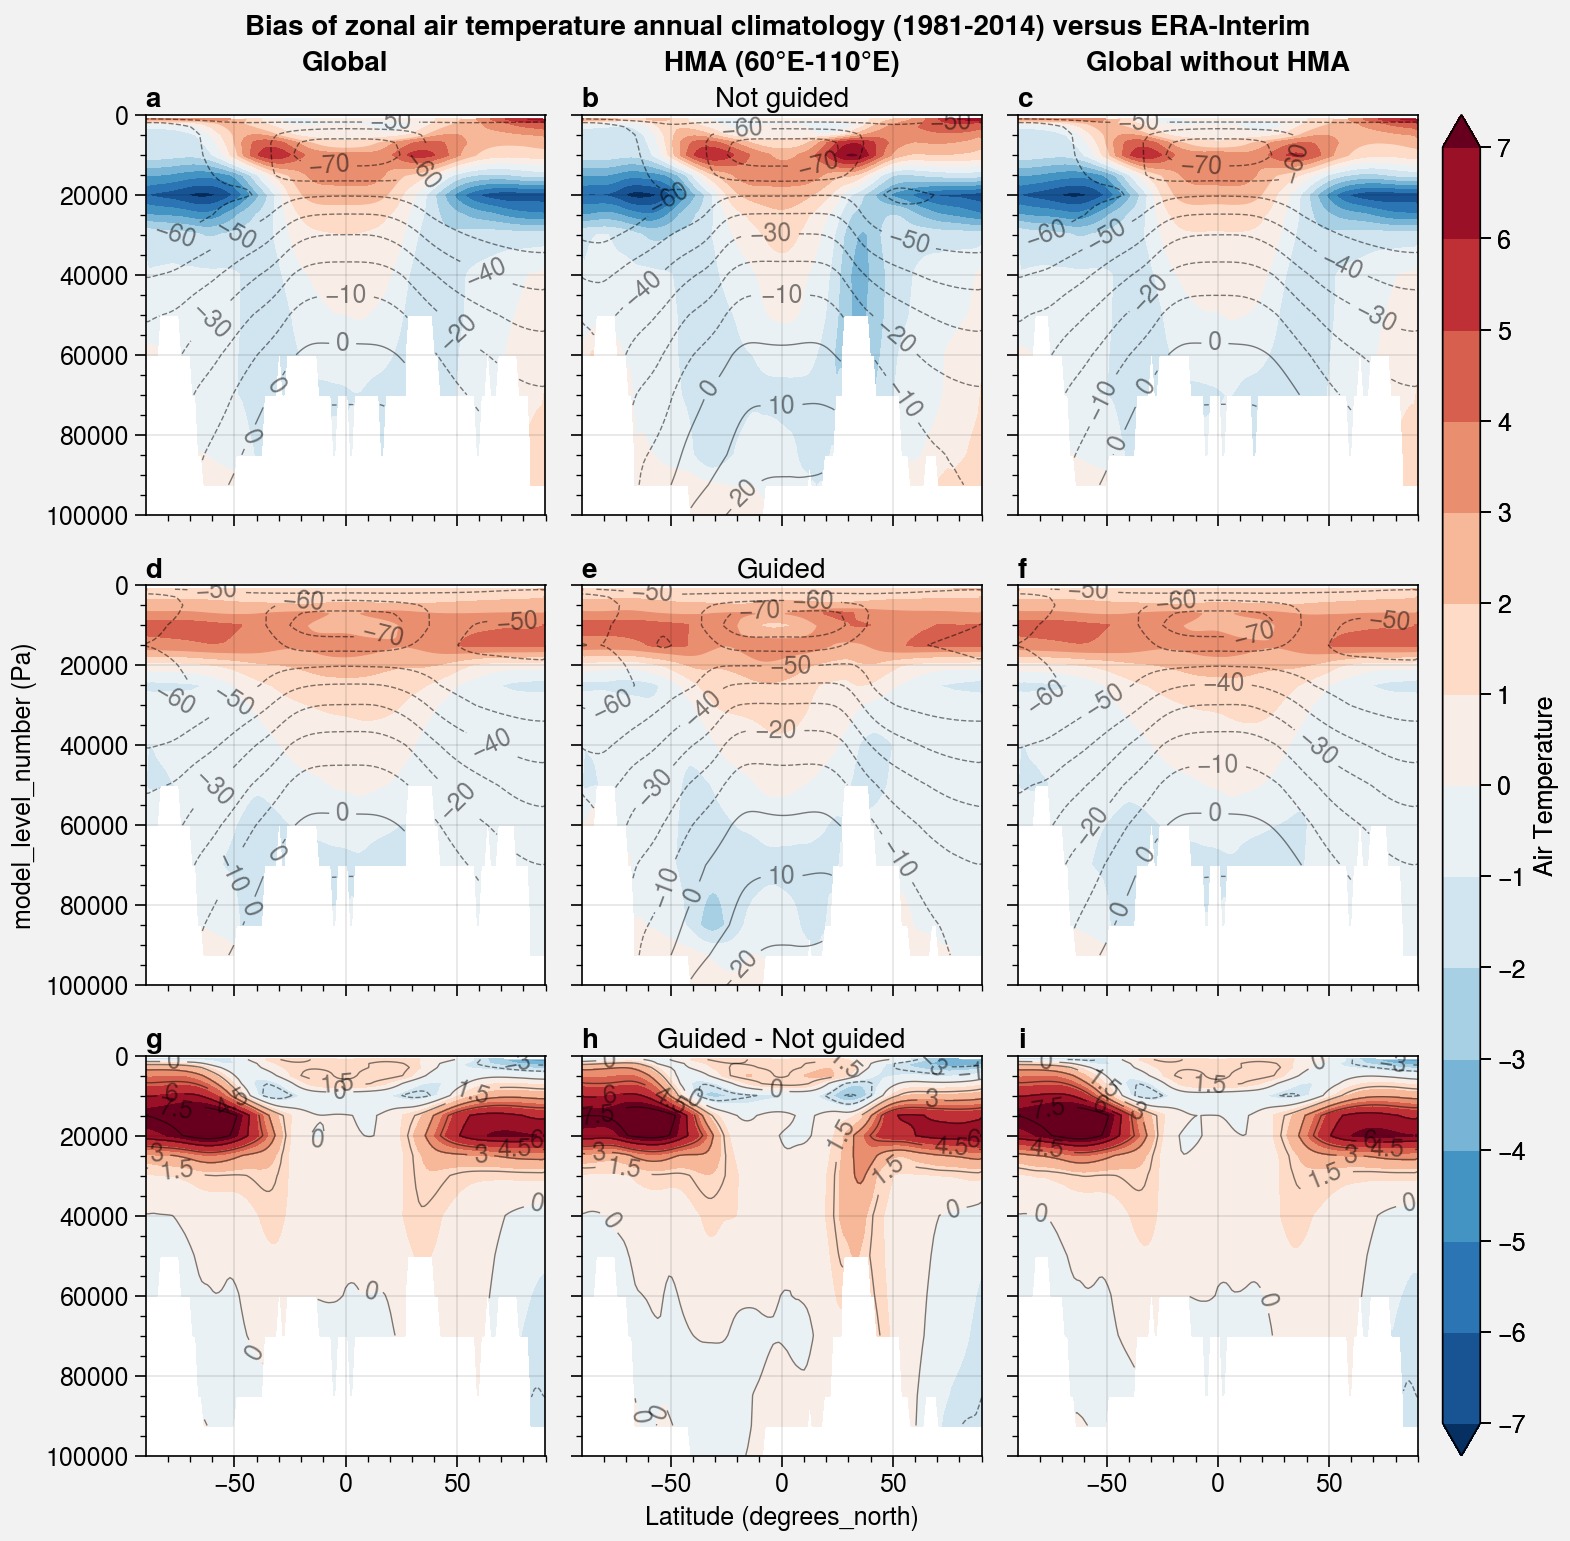

In [92]:
levels=plot.arange(-7,7,1)
extend='both'
cmap='BuRd'
ncols=3
lw=0.5
alpha=0.5
ylim=(100000,0)

f, axs = plot.subplots(ncols=ncols, nrows=3, axwidth=2)

list_models = ['Not guided', 'Guided', 'Guided - Not guided']

k=0
for i in range(0,3):
    # Model
    axs[k].contourf(bias_global[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_global[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title='')
    k += 1

    # ERA-Interim
    axs[k].contourf(bias_HMA[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title=list_models[i])
    k += 1

    # Bias
    m = axs[k].contourf(bias_global_without_HMA[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_global_without_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title='')
    k += 1
    
    
f.colorbar(m, label=label, loc='r')   


axs.format(
    suptitle="Bias of zonal air temperature annual climatology (1981-2014) versus ERA-Interim ",
    collabels=['Global', 'HMA (60°E-110°E)', 'Global without HMA'],
#     rowlabels=list_models,
    abc = True
)

f.save('img/'+var+'_zonal_CM6012-LR-amip-G-02_'+period.start+'-'+period.stop+'.png')
f.save('img/'+var+'_zonal_CM6012-LR-amip-G-02_'+period.start+'-'+period.stop+'.pdf')